In [107]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [108]:
from keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [109]:

answers = {
0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'
}
#


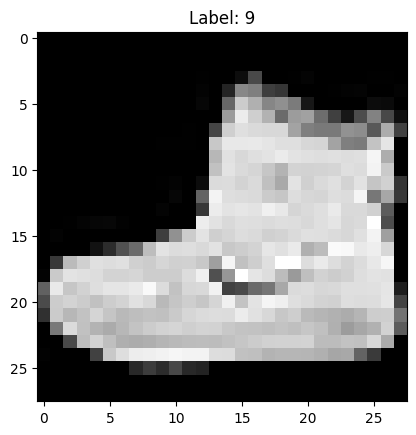

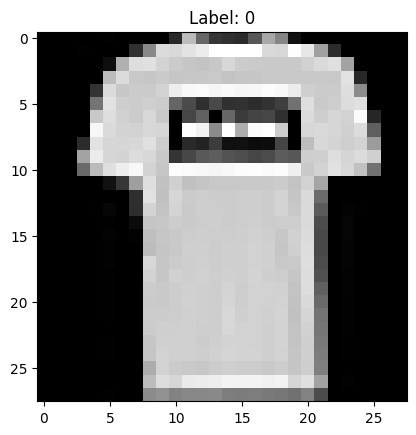

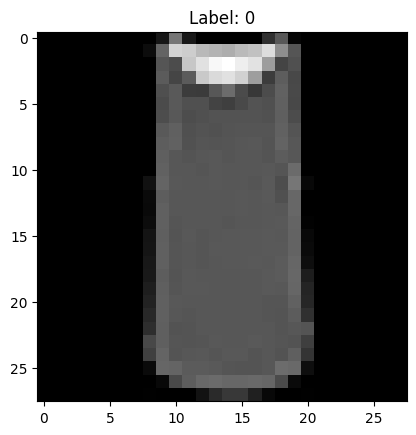

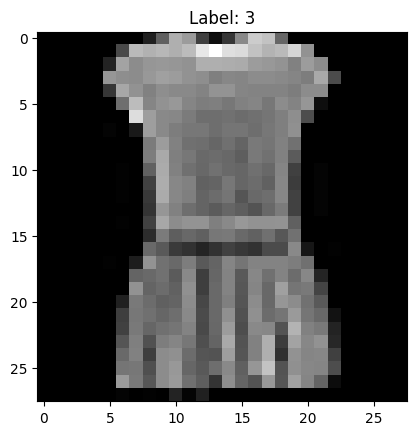

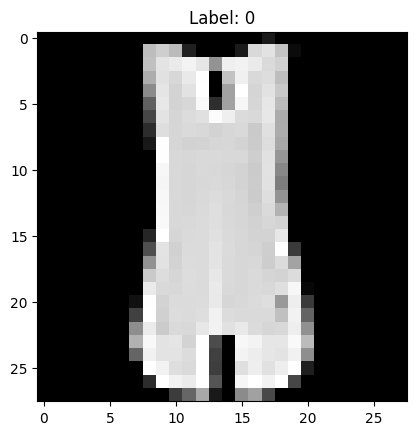

In [110]:
import matplotlib.pyplot as plt
for x, y in zip(train_data[:5], train_labels[:5]):
    plt.imshow(x, cmap='gray')
    plt.title(f'Label: {y}')
    plt.show()

        

In [111]:
train_data.shape

(60000, 28, 28)

In [112]:
train_data, test_data_2 = train_data.reshape([-1, 784]), test_data.reshape([-1, 784])
train_data.shape , train_data.max()


((60000, 784), 255)

In [113]:
test_data_2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [114]:
x_train = train_data / 255
x_test = test_data_2 / 255

x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [115]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential([
    Dense(300, activation= 'relu', input_shape=(784,)),
    Dense(30, activation= 'relu'),
    Dense(10, activation= 'softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)
model.summary()

c:\Users\Вова\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 30)             │         9,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,840 (956.41 KB)

 Trainable params: 244,840 (956.41 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x_train, train_labels, test_size=0.2, random_state=42)

history = model.fit(
    X_train,
    y_train,
    epochs= 30,
    validation_data=(X_valid, y_valid),
    batch_size = 250
)

Epoch 1/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7039 - loss: 0.8526 - val_accuracy: 0.8425 - val_loss: 0.4549
Epoch 2/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8505 - loss: 0.4220 - val_accuracy: 0.8561 - val_loss: 0.4093
Epoch 3/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8690 - loss: 0.3723 - val_accuracy: 0.8633 - val_loss: 0.3796
Epoch 4/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8753 - loss: 0.3465 - val_accuracy: 0.8787 - val_loss: 0.3394
Epoch 5/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8854 - loss: 0.3191 - val_accuracy: 0.8808 - val_loss: 0.3351
Epoch 6/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8904 - loss: 0.2999 - val_accuracy: 0.8768 - val_loss: 0.3352
Epoch 7/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8959 - loss: 0.2868 - val_accuracy: 0.8821 - val_loss: 0.3188
Epoch 8/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9039 - loss: 0.2651 - val_accuracy: 0.

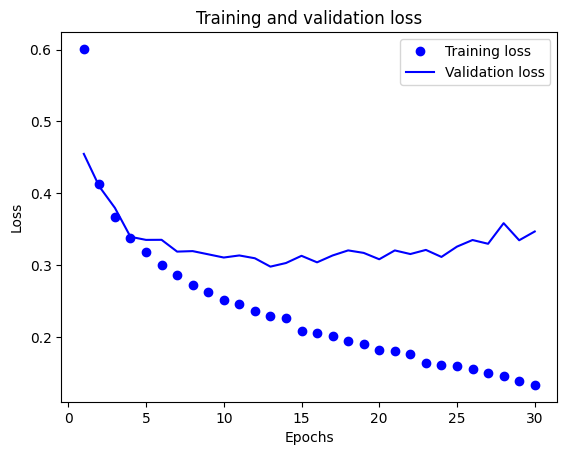

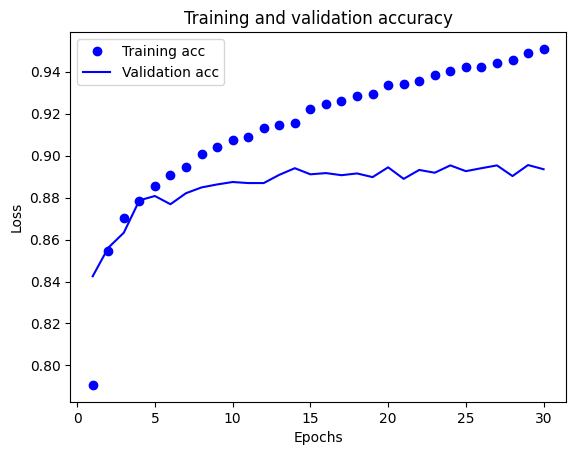

In [117]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


Мене влаштовує 

In [118]:
pred= model.predict(x_test)
prediction_list=[]
for num in pred.argmax(axis=1):
    prediction_list.append(answers[num]) 


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step


In [119]:
prediction_list

['Ankle boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'Shirt',
 'Trouser',
 'Coat',
 'Shirt',
 'Sandal',
 'Sneaker',
 'Coat',
 'Sandal',
 'Sandal',
 'Dress',
 'Coat',
 'Trouser',
 'Pullover',
 'Coat',
 'Bag',
 'T-shirt/top',
 'Pullover',
 'Sandal',
 'Sneaker',
 'Sandal',
 'Trouser',
 'Coat',
 'Shirt',
 'T-shirt/top',
 'Ankle boot',
 'Shirt',
 'Bag',
 'Bag',
 'Dress',
 'Dress',
 'Bag',
 'T-shirt/top',
 'Sneaker',
 'Sandal',
 'Sneaker',
 'Ankle boot',
 'T-shirt/top',
 'Trouser',
 'Shirt',
 'Sneaker',
 'Shirt',
 'Sneaker',
 'Pullover',
 'Trouser',
 'Pullover',
 'Shirt',
 'Coat',
 'Pullover',
 'Sandal',
 'Bag',
 'Pullover',
 'Pullover',
 'Bag',
 'Coat',
 'Bag',
 'T-shirt/top',
 'Sneaker',
 'Sneaker',
 'Bag',
 'Sandal',
 'Trouser',
 'Trouser',
 'Dress',
 'Coat',
 'Sneaker',
 'Bag',
 'Sneaker',
 'T-shirt/top',
 'T-shirt/top',
 'Shirt',
 'Pullover',
 'Dress',
 'Trouser',
 'Pullover',
 'Bag',
 'Coat',
 'Trouser',
 'Bag',
 'Sandal',
 'Ankle boot',
 'Sandal',
 'T-shirt/top',
 'Dress',
 'Pullover'

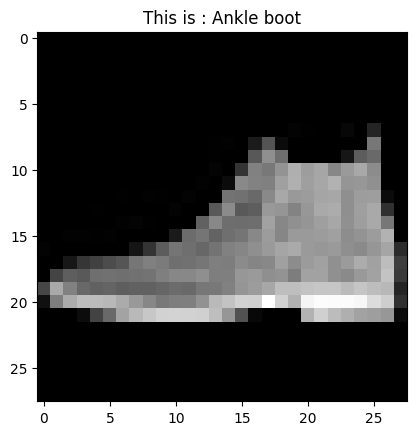

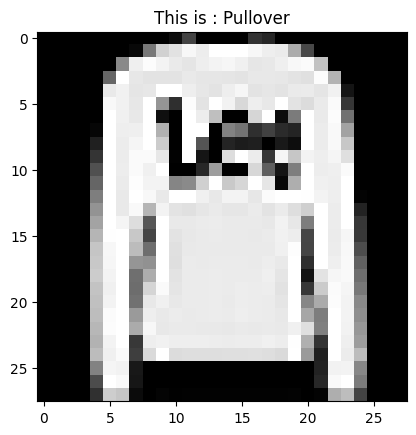

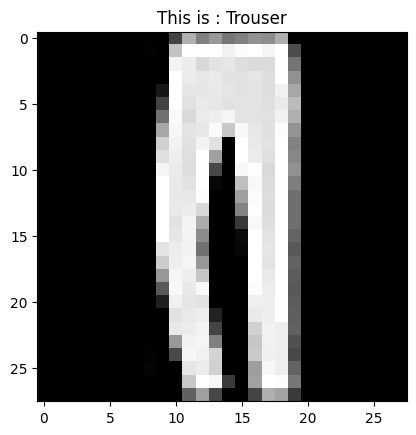

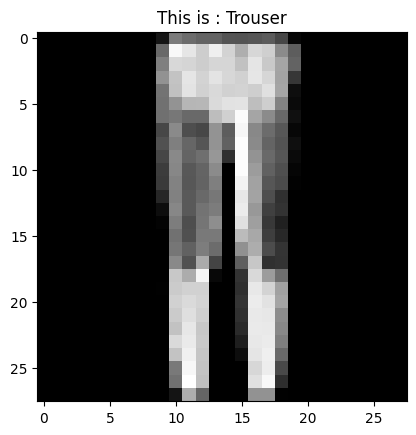

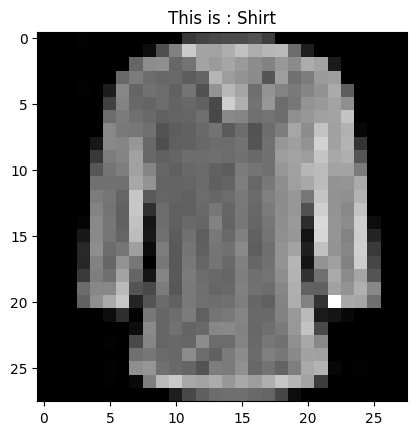

In [120]:
for x, y in zip(test_data[:5], prediction_list[:5]):
    plt.imshow(x, cmap='gray')
    plt.title(f'This is : {y}')
    plt.show()

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred.argmax(axis=1))

0.8907